In [1]:
import numpy as np

In [6]:
a = [[1, 2], [3, 4]]

In [3]:
b = ["a", "b", "b"]

In [15]:
[i for j in a for i in j if i != 1]

[2, 3, 4]

In [46]:
class Individual:
    def __init__(self, ID, parents=None):
        self.ID = ID
        self.parents = [None, None]
        if parents is not None:
            self.parents = parents
        
    def get_tmrca(self, other):
        ancs_self = set([self])
        ancs_other = set([other])
        common_ancs = ancs_self.intersection(ancs_other)
        tmrca = 1
        while len(ancs_self) > 0 and len(ancs_other) > 0:
            ancs_self = set([a for ancs in ancs_self for a in ancs.parents if a is not None])
            ancs_other = set([a for ancs in ancs_other for a in ancs.parents if a is not None])
            common_ancs = ancs_self.intersection(ancs_other)
            
            if len(common_ancs) > 0:
                return tmrca
            
            tmrca += 1
            
        return None

In [47]:
a = Individual(3)

In [48]:
b = Individual(4)

In [49]:
c = Individual(1, [a, b])
d = Individual(2, [a, b])

In [50]:
c.get_tmrca(d)

1

In [159]:
class PedWriter:
    def __init__(self, ninds, ngens=None):
        self.ninds = np.array(ninds).astype(int)
        if hasattr(ninds, '__iter__'):
            self.ngens = len(ninds)
        else:
            assert ngens is not None
            self.ngens = ngens
            self.ninds = [ninds] * ngens
            
        max_inds_per_gen = max([n + 1 for n in self.ninds])
        self.gen_id_digit = 10 ** (np.floor(np.log10(max_inds_per_gen)) + 1)
        self.ped_list = []
        
    def build_ped_list(self, monogamous=False):
        for i in range(self.ngens - 1):
            inds = np.arange(1, self.ninds[i] + 1) + self.gen_id_digit * i
            parents = np.arange(1, self.ninds[i + 1] + 1) + self.gen_id_digit * (i + 1)
            
            if monogamous is True:
                couples = np.random.choice(parents, size=(self.ninds[i] // 2, 2), replace=False)
                parent_choices_idx = np.random.choice(range(couples.shape[0]), size=self.ninds[i])
                parent_choices = couples[parent_choices_idx]
            else:
                parent_choices = np.random.choice(parents, size=(self.ninds[i], 2))
            
            for j in range(len(inds)):
                self.ped_list.append([inds[j], parent_choices[j][0], parent_choices[j][1]])
                
        # Founders denoted by 0 for parents
        for p in set(parent_choices.ravel()):
            self.ped_list.append([p, 0, 0])
                
    def write_ped(self, outfile):
        with open(outfile, 'w') as f:
            for row in self.ped_list:
                line = '\t'.join([str(int(x)) for x in row])
                f.write(line + '\n')
                
            
            
        

In [160]:
BALSAC_ninds = [8000 * np.exp(0.32 * t) for t in range(17)]
pw = PedWriter(BALSAC_ninds)

In [161]:
pw.build_ped_list(monogamous=True)

In [162]:
pw.write_ped('/Users/dnelson/temp/test_ped_monogamous.txt')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df1 = pd.read_csv('/home/dnelson/project/wf_coalescent/results/pedigrees/sfs_Quebec_dtwf.csv')
df2 = pd.read_csv('/home/dnelson/project/wf_coalescent/results/pedigrees/sfs_dtwf_only.csv')
df3 = pd.read_csv('/home/dnelson/project/wf_coalescent/results/pedigrees/sfs_dtwf_only_monogamous.csv')

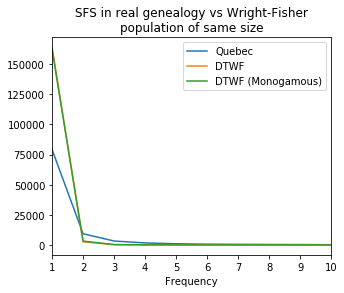

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))

df1.plot('Frequency', 'Count', ax=ax, label='Quebec')
df2.plot('Frequency', 'Count', ax=ax, label='DTWF')
df3.plot('Frequency', 'Count', ax=ax, label='DTWF (Monogamous)')

plt.title('SFS in real genealogy vs Wright-Fisher\npopulation of same size')
plt.xlim(1, 10)
plt.show()

In [126]:
df2.plot?